In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [396]:
np.random.seed(7)

# Generate the data
data1 = np.random.multivariate_normal([4,-1], [[1,0],[0,1]], size = 50)
data2 = np.random.multivariate_normal([6,6], [[1,0.0],[0.0,1]], size = 50)
data3 = np.random.multivariate_normal([-2,2], [[1,0.1],[0.1,1]], size = 50)
data4 = np.random.multivariate_normal([-2,9], [[1,0.1],[0.1,1]], size = 50)
data = np.concatenate([data1, data2, data3, data4], axis = 0)

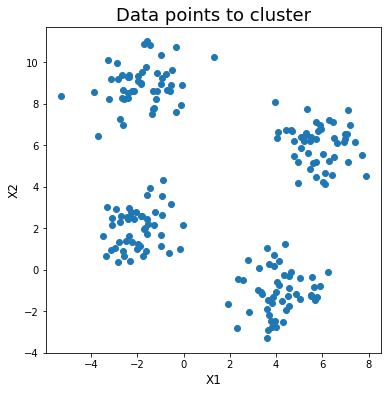

In [397]:
# Plot the 4 clusters
plt.figure(figsize = (6,6))
plt.scatter(data[:,0], data[:,1])
plt.title('Data points to cluster', fontsize = 18)
plt.xlabel('X1', fontsize = 12)
plt.ylabel('X2', fontsize = 12)
plt.show()

**Codind the algorithm**

In [398]:
# Code K-means clustering class
class K_mean:
    # The class is initialized with the number of cluster,
    # the distance metric
    # and maximum number of iterations that can increase if needed
    def __init__(self, n_clusters, distance ='euclidean', max_iterations =100):
        self.n_clusters = n_clusters
        self.distance = distance
        self.max_iterations = max_iterations
        
    # This function calculates the euclidean distance between data points and every centroids
    def distan(self, X):
        dist = np.zeros((self.n, self.n_clusters))
        for i in range(self.n_clusters):
            if self.distance == 'euclidean':
                d = np.sqrt(np.sum((X-self.centroids[i,:])**2, axis =1))
                dist[:,i] = d
            elif self.distance == 'manhattan':
                d = np.sum(np.abs(X-self.centroids[i,:]), axis =1)
                dist[:,i] = d
            else:
                raise NameError ('Distance metric not valid')            
        return dist
        
    # The fit method will ingest the data and find the center of the clusters    
    def fit(self, data):
        
        # Get the number of features (columns) in the data
        self.k = data.shape[1]
        # Get the number of observations (rows) in the data
        self.n = data.shape[0]
        # To randomly initialize the clusters' center, we need min and max value for each feature 
        data_min, data_max = np.min(data, axis = 0), np.max(data, axis = 0)
        # Randomly position the centroids (uniformly)
        self.centroids = np.random.uniform(data_min, data_max, size = (self.n_clusters, self.k))
        
        # Beginning of the the loop
        confluent = False   # Variable to check convergence
        counter = 0         # Variable that counts iterations
        old_closer_cluster = np.zeros((self.n))  # Assign all data points to cluster 0
        while not confluent:
            d = self.distan(data) # Calculate distance between data points and centroids
            closer_cluster = np.argmin(d, axis = 1) # Find to which cluster every data point belong to
            # One hot encode the above array
            close_one_hot = np.zeros((closer_cluster.size, self.n_clusters))
            close_one_hot[np.arange(0,closer_cluster.size ), closer_cluster] = 1 
            
            # Update the centroids coordinates
            new_centroids = np.zeros((self.n_clusters, self.k))
            for i in range(self.n_clusters):
                partial = (data.T * close_one_hot[:,i] ).T
                data_points_per_cluster = np.sum(close_one_hot[:,i])
                new_centroids[i,:] = np.sum(partial, axis = 0) / max(data_points_per_cluster, 1)
                      
            # Check if the c             
            if list(old_closer_cluster) == list(closer_cluster):
                confluent = True
             
            # If max iteration is reached the loop is ended
            if counter == self.max_iterations:
                print('Iterations limit reached')
                break
            counter =+ 1
            
            # Update the position of the centroid of the object
            old_closer_cluster = closer_cluster
            self.centroids = new_centroids
        
        # Assign data point - cluster map to the object
        self.cluster = closer_cluster
        
        # Calculate WCSS
        cent_list = self.centroids[self.cluster]
        WCSS = np.sum((data-cent_list)**2)
        self.WCSS = WCSS  # Assign the WCSS to the object

        return self.centroids, self.cluster

In [399]:
# Test the algorithm with 4 clusters (what we expect)
k = K_mean(4)
centroids, clusters = k.fit(data)

In [400]:
# Check clusters
print(clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


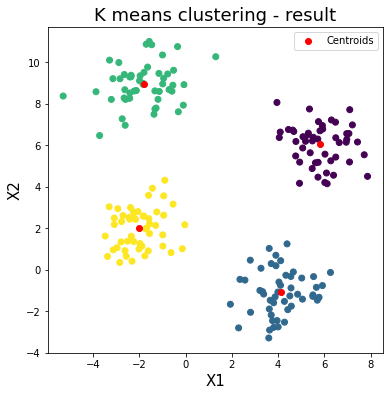

In [401]:
# Plot data points with centroids
plt.figure(figsize = (6,6))
plt.scatter(data[:,0], data[:,1], c = clusters)
plt.scatter(centroids[:,0], centroids[:,1], color ='red', label = 'Centroids')
plt.title('K means clustering - result', fontsize =18)
plt.xlabel('X1', fontsize =15)
plt.ylabel('X2', fontsize =15)
plt.legend()
plt.show()

In [402]:
# Retrieve WCSS
k.WCSS

388.0244875062758

In [403]:
# Create plot of WCSS vs n_clusters to confirm optimal number of clusters with elbow method
wcss = []
max_number_clusters = 15
for i in range(1,max_number_clusters):
    k = K_mean(i)
    centroids, clusters = k.fit(data)
    wcss.append(k.WCSS)

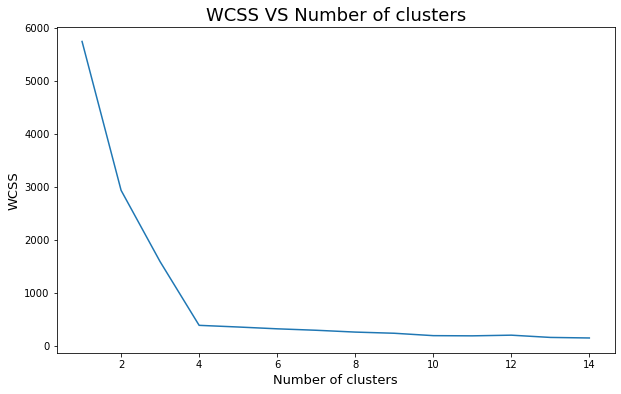

In [404]:
# Plot the graph
plt.figure(figsize = (10,6))
plt.xlabel('Number of clusters', fontsize =13)
plt.title('WCSS VS Number of clusters', fontsize =18)
plt.ylabel('WCSS', fontsize =13)
plt.plot(np.arange(1,max_number_clusters), wcss);

**Confirm results with Sklearn**

In [405]:
# Import Sklearn KMeans class
from sklearn.cluster import KMeans 

KM = KMeans(n_clusters=4)
KM.fit(data)
KM.inertia_

388.02448750627576

# Data scaling example

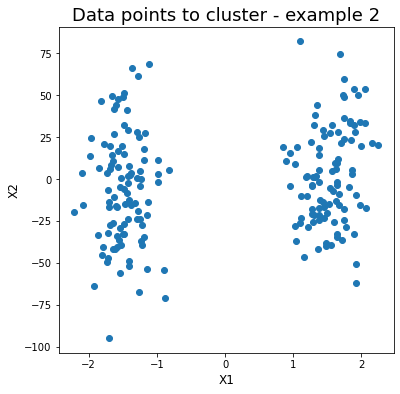

In [406]:
# Generate the data
d1 = np.random.multivariate_normal([-1.5,-3], [[0.1,0.0],[0.0,0.1]], size = 100)
d2 = np.random.multivariate_normal([1.5,-3], [[0.1,0.0],[0.0,0.1]], size = 100)
d1[:,1] = d1[:,1]*100+300
d2[:,1] = d2[:,1]*100+300
d = np.concatenate([d1, d2 ], axis = 0)

# Plot the data
plt.figure(figsize = (6,6))
plt.scatter(d[:,0], d[:,1])
plt.title('Data points to cluster - example 2', fontsize = 18)
plt.xlabel('X1', fontsize = 12)
plt.ylabel('X2', fontsize = 12)
plt.show()

In [407]:
k2 = K_mean(2)
centroids, clusters = k2.fit(d)
print('WCSS', k2.WCSS)

WCSS 67157.55492804406


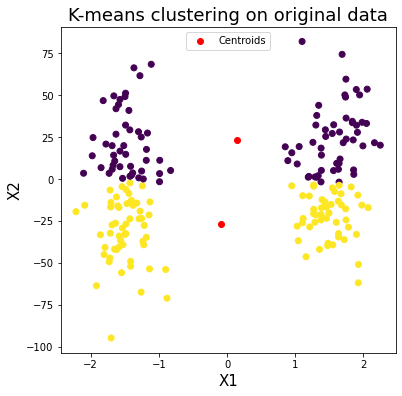

In [408]:
# Plot data points with centroids
plt.figure(figsize = (6,6))
plt.scatter(d[:,0], d[:,1], c = clusters)
plt.scatter(centroids[:,0], centroids[:,1], color ='red', label = 'Centroids')
plt.title('K-means clustering on original data', fontsize =18)
plt.xlabel('X1', fontsize =15)
plt.ylabel('X2', fontsize =15)
plt.legend(loc = 'upper center')
plt.show()

In [409]:
# Standardize the data 
d_mean = np.mean(d, axis= 0) # Calculate mean of each feature
d_std = np.std(d, axis= 0)   # Calculate standard deviation of each feature

# Standardize
d_standardized = (d - d_mean)/d_std

In [410]:
k2_scaled = K_mean(2)
centroids_scaled, clusters_scaled = k2_scaled.fit(d_standardized)
print('WCSS', k2_scaled.WCSS)

WCSS 202.95065994982792


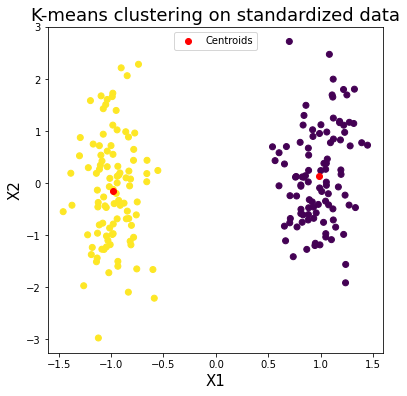

In [411]:
# Plot data points with centroids
plt.figure(figsize = (6,6))
plt.scatter(d_standardized[:,0], d_standardized[:,1], c = clusters_scaled)
plt.scatter(centroids_scaled[:,0], centroids_scaled[:,1], color ='red', label = 'Centroids')
plt.title('K-means clustering on standardized data', fontsize =18)
plt.xlabel('X1', fontsize =15)
plt.ylabel('X2', fontsize =15)
plt.legend(loc = 'upper center')
plt.show()